In [142]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data collection and Preprocessing

In [143]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
#loading data in csv file as pandas data frame

In [144]:
df.head() #To print first five rows of the data frame


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [145]:
#to know the number of rows and columns in the dataset
df.shape

(891, 12)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [147]:
#To find the number of missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [148]:
#Since most of the values are missing in the cabin column. It is removed
df = df.drop(columns = 'Cabin')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [149]:
#Replacing the missing values in the age column with the mean value
df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipykernel_37/951171798.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [150]:
#Replacing the missing values of the 'Embarked' column with the mode
#finding the mode
print(df['Embarked'].mode())
print(df['Embarked'].mode()[0])

#Replacing the missing values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

0    S
Name: Embarked, dtype: object
S


/tmp/ipykernel_37/1991358721.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [151]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Analysis

In [152]:
#Getting the statistical measures about the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [153]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [154]:
sns.set()

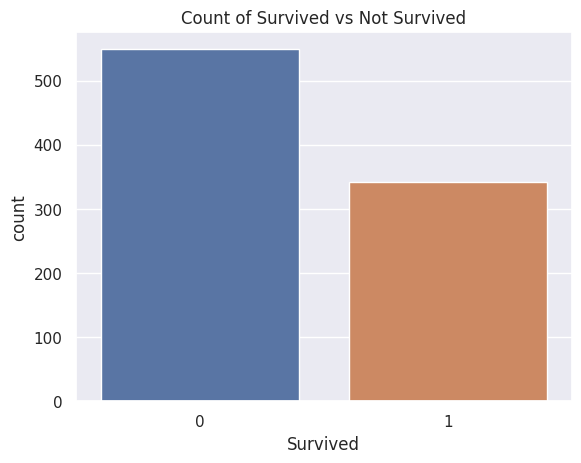

In [155]:
#countplot for people who survived 
sns.countplot(x = 'Survived', data = df)
plt.title("Count of Survived vs Not Survived")
plt.show()

In [156]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

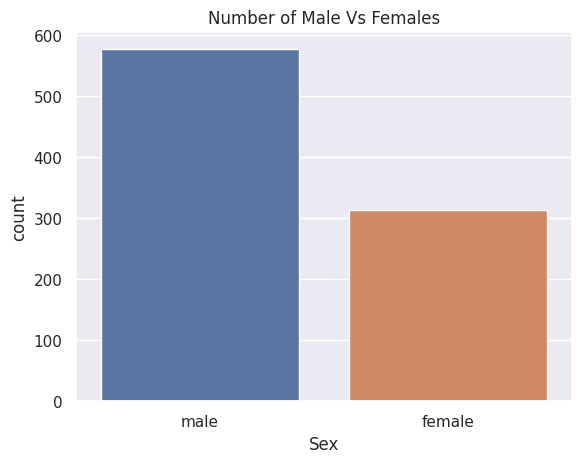

In [157]:
#Number of males vs females plot
sns.countplot(x='Sex',data=df)
plt.title("Number of Male Vs Females")
plt.show()

In [158]:
#stats of survivors based on gender
print(df.groupby('Sex')['Survived'].value_counts())
print(df.groupby('Sex')['Survived'].mean())

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


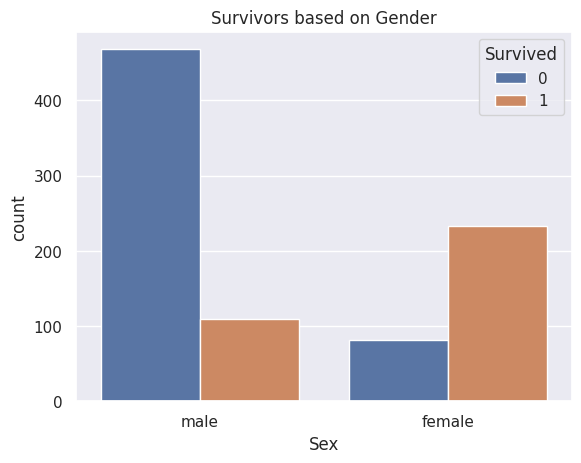

In [159]:
#Ploting Survivor based on gender
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title("Survivors based on Gender")
plt.show()

In [160]:
#Stats based on the ticket class
print(df['Pclass'].value_counts())
print(df.groupby('Pclass')['Survived'].value_counts())
print(df.groupby('Pclass')['Survived'].mean())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


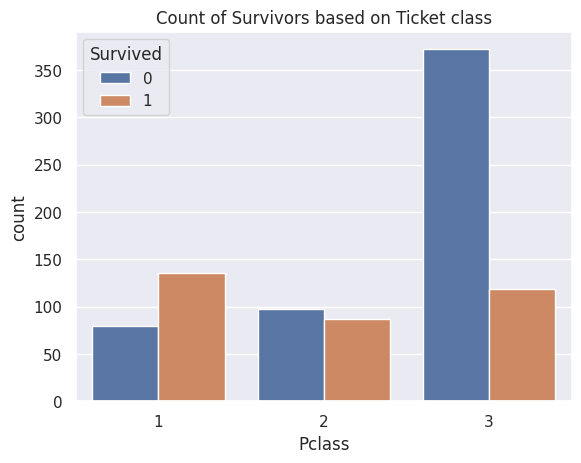

In [161]:
#Ploting survivors based on Ticket class
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("Count of Survivors based on Ticket class")
plt.show()

In [162]:
#Creating new important variables
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 #to include the passenger in the family

In [163]:
#Stats based on the number of family size
print(df['FamilySize'].value_counts().sort_index())
print(df.groupby('FamilySize')['Survived'].value_counts().sort_index())
print(df.groupby('FamilySize')['Survived'].mean())

FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64
FamilySize  Survived
1           0           374
            1           163
2           0            72
            1            89
3           0            43
            1            59
4           0             8
            1            21
5           0            12
            1             3
6           0            19
            1             3
7           0             8
            1             4
8           0             6
11          0             7
Name: count, dtype: int64
FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


In [164]:
df.groupby('FamilySize')['Survived'].agg(['count', 'sum', 'mean'])

,count,sum,mean
FamilySize,,,
1,537,163,0.303538
2,161,89,0.552795
3,102,59,0.578431
4,29,21,0.724138
5,15,3,0.200000
6,22,3,0.136364
7,12,4,0.333333
8,6,0,0.000000
11,7,0,0.000000


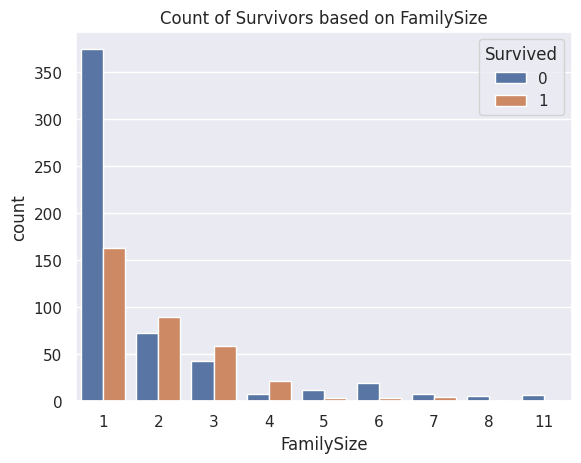

In [165]:
#Ploting survivors based on Family Size
sns.countplot(x='FamilySize',hue='Survived',data=df)
plt.title("Count of Survivors based on FamilySize")
plt.show()

## Encoding Categorical Features

In [166]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [167]:
df.replace({'Sex' : {'male':0,'female':1}, 'Embarked': {'S':0,'C':1,'Q':2}}, inplace=True)
print(df['Embarked'].value_counts())
print(df['Sex'].value_counts())

Embarked
0    646
1    168
2     77
Name: count, dtype: int64
Sex
0    577
1    314
Name: count, dtype: int64


/tmp/ipykernel_37/4030503828.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex' : {'male':0,'female':1}, 'Embarked': {'S':0,'C':1,'Q':2}}, inplace=True)


In [168]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1


## Seperating Target and features


In [169]:
#Droping engineer features and useless features
X = df.drop(columns = ['PassengerId','Name','Ticket','FamilySize','Survived'])
Y = df['Survived']

## Splitting the data into training and test data

In [170]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 8)

In [171]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


## Training the Model

### Logistic Regression Without Feature engineering, feature scaling and regularization

In [172]:
model = LogisticRegression()

In [173]:
model.fit(X_train,Y_train)

LogisticRegression()

### Evaluvating


In [174]:
X_train_pred = model.predict(X_train)

In [175]:
training_data_accuracy = accuracy_score(Y_train,X_train_pred)
print(f"Accuracy on training data = {training_data_accuracy}")

Accuracy on training data = 0.8146067415730337


In [176]:
X_test_pred = model.predict(X_test)

In [177]:
test_data_accuracy = accuracy_score(Y_test,X_test_pred)
print(f"Accuracy on test data = {test_data_accuracy}")

Accuracy on test data = 0.7597765363128491


## Feature Engineering


In [178]:
#Already engineered a feature family size
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,1


In [179]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace({
    'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs', 
    'Lady':'Royal', 'Countess':'Royal', 'Sir':'Royal', 
    'Don':'Royal', 'Dona':'Royal', 'Jonkheer':'Royal', 'Dr':'Officer',
    'Rev':'Officer', 'Major':'Officer', 'Col':'Officer', 'Capt':'Officer'
})

In [180]:
#Ecoding categorical feature using library
from sklearn.preprocessing import LabelEncoder

for col in ['Sex', 'Embarked', 'Title']:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))


In [181]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2,0,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,1,2


## Feature Scaling using library

In [182]:
X1 = df.drop(columns = ['PassengerId','Name','Ticket','Survived'])
Y1 = df['Survived']

In [183]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1, test_size = 0.2, random_state = 8)

In [184]:
# Remember: only scale numarical features, don't scale categorical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['Age', 'Fare', 'FamilySize']

X1_train[cols_to_scale] = scaler.fit_transform(X1_train[cols_to_scale])
X1_test[cols_to_scale] = scaler.transform(X1_test[cols_to_scale])

In [185]:
print(X1_train[cols_to_scale].describe())
print(X1_test[cols_to_scale].describe())

                Age          Fare    FamilySize
count  7.120000e+02  7.120000e+02  7.120000e+02
mean   2.744372e-17 -2.494883e-17  3.867069e-17
std    1.000703e+00  1.000703e+00  1.000703e+00
min   -2.279936e+00 -6.385138e-01 -5.681816e-01
25%   -5.553649e-01 -4.889192e-01 -5.681816e-01
50%   -4.371273e-02 -3.637954e-01 -5.681816e-01
75%    4.375238e-01 -4.544189e-02  5.323975e-02
max    3.798070e+00  9.068122e+00  5.646032e+00
              Age        Fare  FamilySize
count  179.000000  179.000000  179.000000
mean    -0.217587   -0.141215   -0.030079
std      0.944787    0.645020    1.012760
min     -2.260842   -0.638514   -0.568182
25%     -0.708117   -0.488366   -0.568182
50%     -0.043713   -0.392215   -0.568182
75%      0.170208   -0.113036    0.053240
max      2.270549    4.332467    5.646032


## Training model with Regularization

In [186]:
# Range of regularization strengths
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

ridge_train_acc, ridge_test_acc = [], []
lasso_train_acc, lasso_test_acc = [], []

In [187]:
#model with ridge regularization
for c in C_values:
    ridge_model = LogisticRegression(penalty='l2', C=c, max_iter=1000)
    ridge_model.fit(X1_train, Y1_train)
    ridge_train_acc.append(ridge_model.score(X1_train, Y1_train))
    ridge_test_acc.append(ridge_model.score(X1_test, Y1_test))
    print(f"Ridge (L2) | C={c:<6} | Train Acc={ridge_model.score(X1_train, Y1_train):.3f} | Test Acc={ridge_model.score(X1_test, Y1_test):.3f}")


Ridge (L2) | C=0.001  | Train Acc=0.625 | Test Acc=0.609
Ridge (L2) | C=0.01   | Train Acc=0.753 | Test Acc=0.721
Ridge (L2) | C=0.1    | Train Acc=0.823 | Test Acc=0.771
Ridge (L2) | C=1      | Train Acc=0.815 | Test Acc=0.760
Ridge (L2) | C=10     | Train Acc=0.815 | Test Acc=0.760
Ridge (L2) | C=100    | Train Acc=0.816 | Test Acc=0.760


In [188]:
#model with lasso regularization
for c in C_values:
    lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=c, max_iter=1000)
    lasso_model.fit(X1_train, Y1_train)
    lasso_train_acc.append(lasso_model.score(X1_train, Y1_train))
    lasso_test_acc.append(lasso_model.score(X1_test, Y1_test))
    print(f"Lasso (L1) | C={c:<6} | Train Acc={lasso_model.score(X1_train, Y1_train):.3f} | Test Acc={lasso_model.score(X1_test, Y1_test):.3f}")


Lasso (L1) | C=0.001  | Train Acc=0.619 | Test Acc=0.603
Lasso (L1) | C=0.01   | Train Acc=0.619 | Test Acc=0.603
Lasso (L1) | C=0.1    | Train Acc=0.813 | Test Acc=0.743
Lasso (L1) | C=1      | Train Acc=0.815 | Test Acc=0.749
Lasso (L1) | C=10     | Train Acc=0.815 | Test Acc=0.754
Lasso (L1) | C=100    | Train Acc=0.816 | Test Acc=0.760


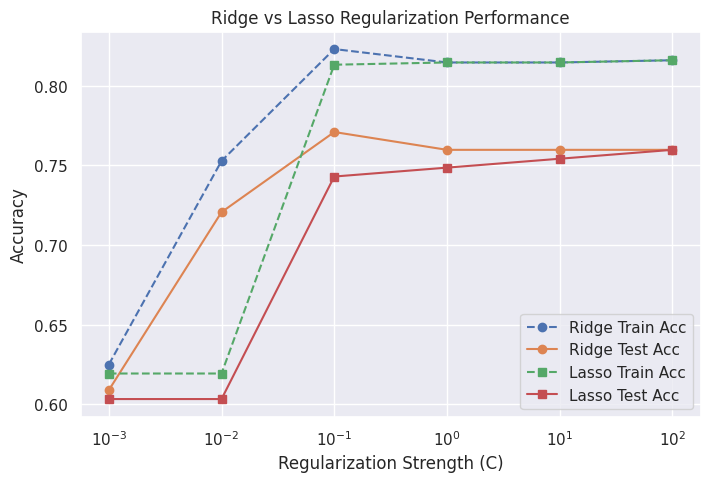

In [189]:
# Plotting
plt.figure(figsize=(8,5))
plt.plot(C_values, ridge_train_acc, marker='o', label='Ridge Train Acc', linestyle='--')
plt.plot(C_values, ridge_test_acc, marker='o', label='Ridge Test Acc')
plt.plot(C_values, lasso_train_acc, marker='s', label='Lasso Train Acc', linestyle='--')
plt.plot(C_values, lasso_test_acc, marker='s', label='Lasso Test Acc')

plt.xscale('log')  # because C spans multiple orders of magnitude
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Ridge vs Lasso Regularization Performance')
plt.legend()
plt.grid(True)
plt.show()

# Final Result

Final Model: Ridge Regularization (L2)
Best Regularization Parameter (C): 0.1
Training Accuracy: 0.823
Testing Accuracy:  0.771

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       108
           1       0.77      0.61      0.68        71

    accuracy                           0.77       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.77      0.77      0.76       179



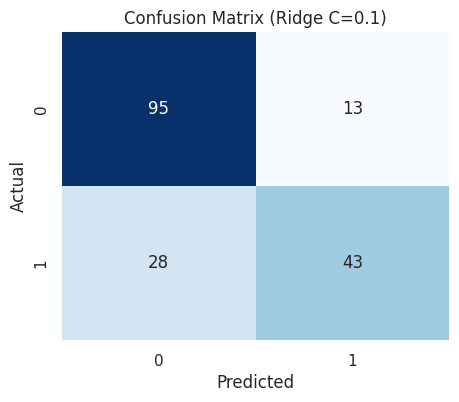

In [190]:
# Train final Ridge model with best C
best_model = LogisticRegression(penalty='l2', C=0.1, max_iter=1000)
best_model.fit(X1_train, Y1_train)

# Predictions
y_train_pred = best_model.predict(X1_train)
y_test_pred = best_model.predict(X1_test)

# Evaluation metrics
train_acc = accuracy_score(Y1_train, y_train_pred)
test_acc = accuracy_score(Y1_test, y_test_pred)

print("Final Model: Ridge Regularization (L2)")
print(f"Best Regularization Parameter (C): 0.1")
print(f"Training Accuracy: {train_acc:.3f}")
print(f"Testing Accuracy:  {test_acc:.3f}")

print("\nClassification Report (Test Data):")
print(classification_report(Y1_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(Y1_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (Ridge C=0.1)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [191]:
#Most important features affecting target
feature_importance = pd.DataFrame({
    'Feature': X1_train.columns,
    'Coefficient': best_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)


      Feature  Coefficient
1         Sex     1.947336
5        Fare     0.145435
6    Embarked     0.133381
4       Parch    -0.043675
9       Title    -0.139856
7  FamilySize    -0.196392
3       SibSp    -0.272363
2         Age    -0.289018
8     IsAlone    -0.521927
0      Pclass    -0.802646
